<a href="https://colab.research.google.com/github/bastiansosa/optmizacion/blob/main/optimizacion(generico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pylab as plt


In [19]:
K = 256e3
n = 10 #cantidad de segmento
m = 5 #cantidad de usuarios o pears

B = 100e6*np.random.rand(m)
MD = np.random.randint(0,2,(m,n))

sol = np.random.randint(1,m+1,n)

In [22]:
def fitness(sol):
  m,n=MD.shape #m->cantidad de peers, n->cantidad de segmento
  count = np.zeros(m)
  for i in range(m):
    count[i] = np.sum(sol==(i+1))
  t = count*K/B
  t_max = np.max(t)
  t_mean = n*K/np.sum(B)
  return np.abs(t_max-t_mean)
  

In [12]:
sol = np.random.randint(1,m+1,(n))
fitness(sol,MD,K,B)

7.999402329467802

algoritmos geneticos


In [13]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.4 MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15097 sha256=edb51d8fad2facd03579289c5d12c497066ddd37cbb314137f5beda8f84d3fe2
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [14]:
from geneticalgorithm import geneticalgorithm as ga

In [23]:
model = ga(function=fitness,
           dimension=n,
           variable_type='int',
           variable_boundaries=np.array([[1,m]]*n),
          )

In [24]:
model.param['max_num_iteration']=500
model.param['population_size']=50

In [25]:
model.param

{'max_num_iteration': 500,
 'population_size': 50,
 'mutation_probability': 0.1,
 'elit_ratio': 0.01,
 'crossover_probability': 0.5,
 'parents_portion': 0.3,
 'crossover_type': 'uniform',
 'max_iteration_without_improv': None}

 The best solution found:
 [1. 4. 2. 1. 4. 3. 4. 4. 3. 5.]

 Objective function:
 0.001630874014798547


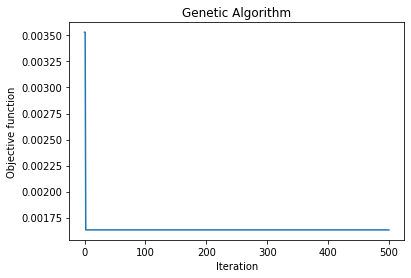

In [26]:
model.run()